<a href="https://colab.research.google.com/github/raveheart1/ScoreSage/blob/main/ScoreSage_first_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# installing dependencies
import pandas as pd
import seaborn as sns
import numpy as np


In [46]:
data = pd.read_csv("/content/sports_data.csv")

In [ ]:
data.head()

,team_1,team_2,team_1_odds,team_2_odds,team_1_points,team_2_points,result,team_1_rank,team_2_rank,attendance,weather,day_night
0,Falcons,Dragons,2.15,1.85,102,98,1,12,34,24567,Sunny,Day
1,Tigers,Lions,1.95,2.05,89,92,0,23,18,32000,Rainy,Night
2,Wolves,Eagles,2.05,1.95,110,105,1,7,29,15000,Cloudy,Day
3,Sharks,Dolphins,1.80,2.20,97,99,0,16,22,28000,Windy,Night
4,Panthers,Bears,2.30,1.70,88,90,0,30,10,21000,Sunny,Day


In [ ]:
data.tail()

,team_1,team_2,team_1_odds,team_2_odds,team_1_points,team_2_points,result,team_1_rank,team_2_rank,attendance,weather,day_night
118,Cyclones,Twisters,2.00,2.00,100,100,0,19,19,29000,Sunny,Day
119,Stallions,Mustangs,1.85,2.15,106,102,1,10,28,27000,Rainy,Night
120,Jets,Comets,2.20,1.80,90,92,0,27,9,23000,Cloudy,Day
121,Hornets,Wasps,1.70,2.30,115,110,1,8,24,35000,Windy,Night
122,Pythons,Cobras,2.10,1.90,99,101,0,14,17,25000,Sunny,Day


In [ ]:
data.columns

Index(['team_1', 'team_2', 'team_1_odds', 'team_2_odds', 'team_1_points',
       'team_2_points', 'result', 'team_1_rank', 'team_2_rank', 'attendance',
       'weather', 'day_night'],
      dtype='object')

In [ ]:
data.shape

(123, 12)

In [ ]:
data.describe()

,team_1_odds,team_2_odds,team_1_points,team_2_points,result,team_1_rank,team_2_rank,attendance
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,1.954065,2.014228,100.235772,99.447154,0.487805,16.414634,17.739837,26890.788618
std,0.177597,0.173267,8.154332,5.736286,0.501896,6.675041,6.282734,4873.357186
min,1.600000,1.700000,87.000000,89.000000,0.000000,5.000000,7.000000,15000.000000
25%,1.800000,1.850000,94.000000,96.000000,0.000000,11.000000,13.000000,23000.000000
50%,1.950000,2.000000,100.000000,100.000000,0.000000,15.000000,18.000000,26000.000000
75%,2.100000,2.150000,106.000000,102.000000,1.000000,22.000000,22.500000,29000.000000
max,2.300000,2.350000,120.000000,115.000000,1.000000,30.000000,34.000000,40000.000000


In [ ]:
data.isnull()

,team_1,team_2,team_1_odds,team_2_odds,team_1_points,team_2_points,result,team_1_rank,team_2_rank,attendance,weather,day_night
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
118,False,False,False,False,False,False,False,False,False,False,False,False
119,False,False,False,False,False,False,False,False,False,False,False,False
120,False,False,False,False,False,False,False,False,False,False,False,False
121,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# visualization
data.head()


,team_1,team_2,team_1_odds,team_2_odds,team_1_points,team_2_points,result,team_1_rank,team_2_rank,attendance,weather,day_night
0,Falcons,Dragons,2.15,1.85,102,98,1,12,34,24567,Sunny,Day
1,Tigers,Lions,1.95,2.05,89,92,0,23,18,32000,Rainy,Night
2,Wolves,Eagles,2.05,1.95,110,105,1,7,29,15000,Cloudy,Day
3,Sharks,Dolphins,1.80,2.20,97,99,0,16,22,28000,Windy,Night
4,Panthers,Bears,2.30,1.70,88,90,0,30,10,21000,Sunny,Day


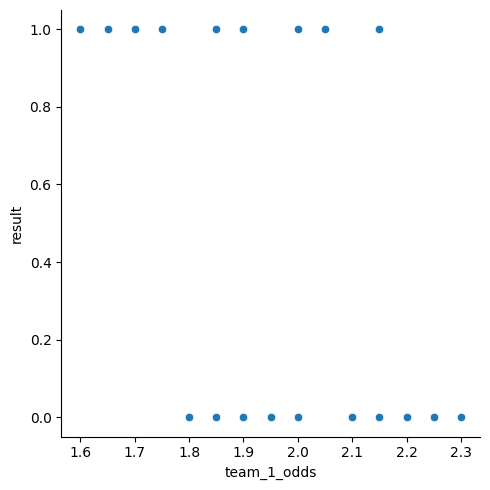

In [ ]:
sns.relplot(x='team_1_odds', y='result', data=data)

In [54]:
# model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train = data.drop(['result', 'team_1', 'team_2', 'weather', 'day_night'], axis=1)
test = data['result']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

In [56]:
regr = LinearRegression()

In [58]:
regr.fit(X_train, y_train)

LinearRegression()